# Covid-19 - Brasil
## Redes Complexas - 2020/1
Alunos: 
1. Johnny Gomes
2. Nomeriano Neto
3. Reinaldo Ribeiro

In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Entendimento dos dados a partir de graficos e outros indicadores 

In [2]:
# lê info regionais - divididos por estados, inclusive

df = pd.read_csv("./data/covid_regioes.csv")
df.sample(5)


,regiao,estado,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
352,Norte,PA,15,12/04/20,16,246,29,13,3
236,Norte,AM,13,27/05/20,22,33508,1559,1891,39
1198,Nordeste,SE,28,12/04/20,16,44,2,4,0
2176,Centro-Oeste,GO,52,16/03/20,12,3,0,0,0
2052,Centro-Oeste,MS,50,30/04/20,18,255,6,9,0


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# reordena registros (rows) do dataframe para que estados aparecam em ordem alfabetica:

df.sort_values(by=['estado', 'semanaEpi'], inplace=True, ignore_index=True)

df.head()


,regiao,estado,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,Norte,AC,12,19/03/20,12,3,3,0,0
1,Norte,AC,12,20/03/20,12,7,4,0,0
2,Norte,AC,12,21/03/20,12,9,2,0,0
3,Norte,AC,12,22/03/20,13,11,2,0,0
4,Norte,AC,12,23/03/20,13,11,0,0,0


In [5]:

df.shape


(2355, 9)

In [7]:

# df.info()


In [8]:
# le dados a partir do pandas dataframe:

# G = nx.from_pandas_edgelist(df, source='pais', target='regiao')
G = nx.from_pandas_edgelist(df, source='regiao', target='estado')


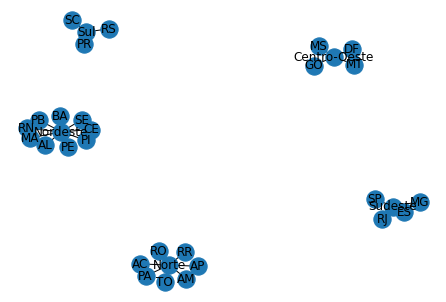

In [10]:

nx.draw(G, with_labels=True)


In [9]:
# cria lista -- em ordem alfabetica -- de nós-estados:
estados = df.estado.unique()
estados = list(estados)

# cria lista -- em ordem alfabetica -- de nós-regioes:
regioes = df.regiao.unique()
regioes = list(regioes)


In [10]:
# instancia nós-estado com parametros iguais a todos:
for e in estados:
    G.add_node(e,
              dim='estado',
              totalCasos = 0,
              totalMortes = 0,
              temperatura=0)

for r in regioes:
    G.add_node(r,
              dim='regiao',
              totalCasos = 0,
              totalMortes = 0,
              temperatura=0)

In [11]:
color_map = []
for no in G.nodes(data=True):
    if (no[1]['dim'] == 'regiao'):
        color_map.append('green')
    else: 
        color_map.append('blue')

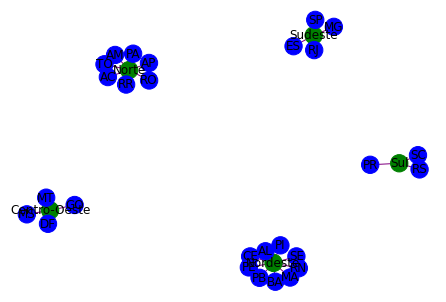

In [12]:
# desenha o grafo G:

nx.draw(G, node_color=color_map, edge_color='purple', with_labels=True)


In [13]:
for node in G.nodes(data=True):
    print(node)

('Norte', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('AC', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('Nordeste', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('AL', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('AM', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('AP', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('BA', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('CE', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('Centro-Oeste', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('DF', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('Sudeste', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('ES', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('GO', {'dim': 'estado', 'to

In [14]:
# informacoes sobre o grafo atual:

nx.info(G)


'Name: \nType: Graph\nNumber of nodes: 32\nNumber of edges: 27\nAverage degree:   1.6875'

In [15]:
df.sample(5)

,regiao,estado,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
2331,Norte,TO,17,16/05/20,20,1279,100,27,3
2009,Sul,SC,42,27/03/20,13,149,27,1,0
2325,Norte,TO,17,10/05/20,20,688,116,11,2
2277,Norte,TO,17,23/03/20,13,5,3,0,0
175,Norte,AM,13,15/03/20,12,1,1,0,0


In [16]:
# definidos/instanciados anteriormente no inicio do notebook:

print(estados, regioes)


['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'] ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']


In [17]:
# aqui apenas para matar a curiosidade quanto a estrutura alternativa do dataframe:
# total = df.groupby(['regiao','estado'])
# total.first()

In [18]:

tot_est     = df.groupby('estado')['casosAcumulado'].max()
tot_est_sum = df.groupby('estado')['casosAcumulado'].max().sum()

tot_reg     = df.groupby(['regiao', 'estado'])['casosAcumulado'].max()
tot_reg_sum = df.groupby(['regiao', 'estado'])['casosAcumulado'].max().sum()

In [19]:
# print(tot_reg)
type(tot_reg_sum)

numpy.int64

In [20]:
est_list = dict(tot_est)
est_list

{'AC': 8128,
 'AL': 15706,
 'AM': 49811,
 'AP': 13294,
 'BA': 28715,
 'CE': 65605,
 'DF': 16629,
 'ES': 20659,
 'GO': 6124,
 'MA': 49371,
 'MG': 15883,
 'MS': 2324,
 'MT': 4100,
 'PA': 56032,
 'PB': 20951,
 'PE': 40705,
 'PI': 7621,
 'PR': 7031,
 'RJ': 69499,
 'RN': 10888,
 'RO': 8626,
 'RR': 5768,
 'RS': 12250,
 'SC': 11565,
 'SE': 9727,
 'SP': 144593,
 'TO': 5807}

In [21]:
# atribui casos acumulados a cada no-estado:

for no in G.nodes(data=True):
    if (no[1]['dim'] == 'estado'):
#         print(no)
        for caso_estado in est_list:
            if (no[0]==caso_estado):
                no[1]['totalCasos'] = est_list[caso_estado]
#                 print(no[0], '->', caso_estado)
     

In [22]:
# just for fun:

for no in G.nodes(data=True):
    if (no[1]['dim'] == 'estado'):
        print(no)


('AC', {'dim': 'estado', 'totalCasos': 8128, 'totalMortes': 0, 'temperatura': 0})
('AL', {'dim': 'estado', 'totalCasos': 15706, 'totalMortes': 0, 'temperatura': 0})
('AM', {'dim': 'estado', 'totalCasos': 49811, 'totalMortes': 0, 'temperatura': 0})
('AP', {'dim': 'estado', 'totalCasos': 13294, 'totalMortes': 0, 'temperatura': 0})
('BA', {'dim': 'estado', 'totalCasos': 28715, 'totalMortes': 0, 'temperatura': 0})
('CE', {'dim': 'estado', 'totalCasos': 65605, 'totalMortes': 0, 'temperatura': 0})
('DF', {'dim': 'estado', 'totalCasos': 16629, 'totalMortes': 0, 'temperatura': 0})
('ES', {'dim': 'estado', 'totalCasos': 20659, 'totalMortes': 0, 'temperatura': 0})
('GO', {'dim': 'estado', 'totalCasos': 6124, 'totalMortes': 0, 'temperatura': 0})
('MA', {'dim': 'estado', 'totalCasos': 49371, 'totalMortes': 0, 'temperatura': 0})
('MG', {'dim': 'estado', 'totalCasos': 15883, 'totalMortes': 0, 'temperatura': 0})
('MS', {'dim': 'estado', 'totalCasos': 2324, 'totalMortes': 0, 'temperatura': 0})
('MT', 

In [23]:
# soma casos dos estados e aribui a respectiva regiao:

casos_regiao = {}
for regiao in regioes:
    # encontra vizinhos (conectados) ao no-regiao
    est = G.neighbors(regiao)
    estados_da_regiao = list(est)
    sum_casos_regiao = 0
    for est in estados_da_regiao:
        sum_casos_regiao += G.nodes[est]['totalCasos']
        # cria dicionario dinamicamente:
        casos_regiao[regiao] = sum_casos_regiao

# sum_casos_regiao
print(casos_regiao)


{'Norte': 147466, 'Nordeste': 249289, 'Centro-Oeste': 29177, 'Sudeste': 250634, 'Sul': 30846}


In [24]:
# atribui total de casos aos nos-regioes:

for regiao in regioes:
    G.nodes[regiao]['totalCasos'] = casos_regiao[regiao]

In [25]:
for no in G.nodes(data=True):
    print(no)

('Norte', {'dim': 'regiao', 'totalCasos': 147466, 'totalMortes': 0, 'temperatura': 0})
('AC', {'dim': 'estado', 'totalCasos': 8128, 'totalMortes': 0, 'temperatura': 0})
('Nordeste', {'dim': 'regiao', 'totalCasos': 249289, 'totalMortes': 0, 'temperatura': 0})
('AL', {'dim': 'estado', 'totalCasos': 15706, 'totalMortes': 0, 'temperatura': 0})
('AM', {'dim': 'estado', 'totalCasos': 49811, 'totalMortes': 0, 'temperatura': 0})
('AP', {'dim': 'estado', 'totalCasos': 13294, 'totalMortes': 0, 'temperatura': 0})
('BA', {'dim': 'estado', 'totalCasos': 28715, 'totalMortes': 0, 'temperatura': 0})
('CE', {'dim': 'estado', 'totalCasos': 65605, 'totalMortes': 0, 'temperatura': 0})
('Centro-Oeste', {'dim': 'regiao', 'totalCasos': 29177, 'totalMortes': 0, 'temperatura': 0})
('DF', {'dim': 'estado', 'totalCasos': 16629, 'totalMortes': 0, 'temperatura': 0})
('Sudeste', {'dim': 'regiao', 'totalCasos': 250634, 'totalMortes': 0, 'temperatura': 0})
('ES', {'dim': 'estado', 'totalCasos': 20659, 'totalMortes': 

In [26]:
# ---------------------------------------------------------------- #
#             CRIAR ARESTAS QUE FALTAM AO GRAFO:
# ---------------------------------------------------------------- #

In [27]:
# 1 - cria arestas a partir da distribuicao geografica das regioes:

G.add_edges_from(
    [('Norte', 'Nordeste'), ('Norte', 'Centro-Oeste'), ('Nordeste', 'Centro-Oeste'), ('Nordeste', 'Sudeste'),
     ('Centro-Oeste', 'Sudeste'),('Centro-Oeste', 'Sul'), ('Sudeste', 'Sul')])


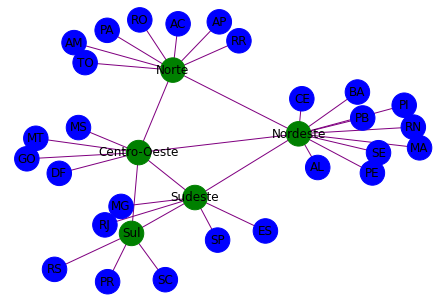

In [28]:
nx.draw(G, node_color=color_map, edge_color='purple', node_size=600, with_labels=True)
plt.savefig('estrutura.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
# cria arestas a partir da disposicao geografica entre nos-estados por regiao:

# 1. Regiao Sul:
G.add_edges_from(
    [('RS', 'SC'),('SC', 'PR')]) # ok

# 2. Sudeste:
G.add_edges_from(
    [('SP', 'MG'), ('SP', 'RJ'), ('RJ', 'MG'),('RJ', 'ES'),('ES', 'MG')]) # ok

# 3. Centro-Oeste:
G.add_edges_from(
    [('DF', 'GO'), ('GO', 'MT'),('GO', 'MS'),('MT','MS')]) # ok

# 4. Norte:
G.add_edges_from(
    [('TO', 'PA'),('PA', 'AP'),('PA', 'RR'),('PA', 'AM'),('AM', 'AC'),
     ('AM', 'RO'),('AM','RR'),('AC', 'RO')]) # ok

# 5. Nordeste:
G.add_edges_from(
    [('BA', 'SE'), ('BA', 'AL'),('BA', 'PE'),('BA', 'PI'),('PE', 'PB'),
     ('PE', 'CE'),('PE', 'PI'),('CE', 'PI'),('CE', 'PB'),('SE','AL'),
     ('AL','PE'),('CE', 'RN'),('PB', 'RN'),('PI','MA')]) # ok


In [37]:
# mapeia as arestas extra-regionais:

G.add_edges_from(
    [('PR', 'SP'),('PR', 'MS'),('ES', 'BA'),('MG', 'BA'),('SP', 'MS'),('MG', 'GO'),
     ('TO', 'GO'),('TO', 'MT'),('TO', 'MA'),('TO','PI'),('TO','BA'),
     ('GO','BA'),('PA','MA'),('PA','MT'),('RO','MT')])


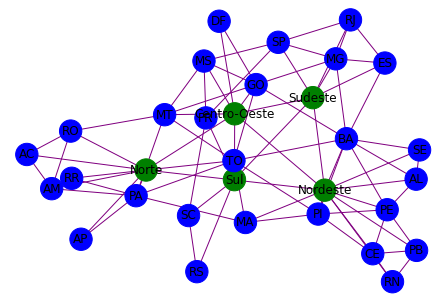

In [38]:
# desenha o grafo em sua estrutura final em relacao vertices a arestas:

nx.draw(G, node_color=color_map, edge_color='purple', node_size=500, with_labels=True)
plt.savefig('fronteiras_estados-regioes.png', dpi=300, bbox_inches='tight')
plt.show()


In [39]:
import sys
print(sys.version)
print(nx.__version__)

3.6.10 | packaged by conda-forge | (default, Apr 24 2020, 16:44:11) 
[GCC 7.3.0]
2.4


In [43]:
# usa bokeh para plotar o grafo:

from bokeh.io import output_file, show
# from bokeh.plotting import figure, from_networkx

from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool,
                          TapTool,EdgesAndLinkedNodes,NodesAndLinkedEdges)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx


In [44]:
SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "black", "red"
edge_attrs = {}

for start_node, end_node, _ in G.edges(data=True):
    edge_color = SAME_CLUB_COLOR if G.nodes[start_node]["dim"] == G.nodes[end_node]["dim"] else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(G, edge_attrs, "edge_color")

# Show with Bokeh
plot = Plot(plot_width=600, plot_height=600,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Covid-19 Estados/Regioes/Brasil"

node_hover_tool = HoverTool(tooltips=[("", "@index"), ("Casos", "@totalCasos")])
plot.add_tools(node_hover_tool, TapTool(), BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=30, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)

plot.renderers.append(graph_renderer)

output_file("covid19.html")
show(plot)

In [40]:
# import networkx as nx

# from bokeh.io import output_file, show
# from bokeh.models import (BoxSelectTool, Circle, HoverTool,
#                           MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,)
# from bokeh.palettes import Spectral4
# from bokeh.plotting import from_networkx

In [45]:
# # colore o grafo de acordo com tipo do no (estado ou regiao)
# ESTADO, REGIAO = "blue", "green"
# node_cor = {}
# node_dia = {}

# for vertice in G.nodes(data=True):
#     node_dia[vertice[0]] = vertice[1]['totalCasos']
#     node_color = ESTADO if vertice[1]['dim'] == 'estado' else REGIAO
#     node_cor[vertice[0]] = node_color
    

# print(node_cor)
# print(node_dia)
# isinstance(node_cor, dict)


In [46]:


# # set node attributes
# nx.set_node_attributes(G, 'node_color', node_cor)
# nx.set_node_attributes(G, 'node_size', node_dia)


# plot = Plot(plot_width=600, plot_height=600,
#             x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
# plot.title.text = "Covid-19 Brasil"

# node_hover_tool = HoverTool(tooltips=[("", "@index"), ("Casos", "@totalCasos")])
# plot.add_tools(node_hover_tool, TapTool(), BoxZoomTool(), ResetTool(),TapTool(), BoxSelectTool())

# graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0,0))

# graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
# graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
# graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

# graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=2)
# graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=2)
# graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=2)

# graph_renderer.selection_policy = NodesAndLinkedEdges()

# plot.renderers.append(graph_renderer)

# output_file("covid19-Brasil.html")
# show(plot)

### Documentacao do processo - Pipeline da Produção da Rede Covid-19 - Brasil


Obs.: Esse _pipeline_ foi desenvolvido para trabalhos na área de **Descoberta de Conhecimento**, entretanto a certo ponto os passos bem definidos podem ajudar na compreensão e tratamento dos dados e posterior obtenção e apresentação do conhecimento obtido.

mais informações em: [KDD - Descoberta de Conhecimento em Bases de Dados](https://lume.ufrgs.br/handle/10183/8968)

### 1. Entendimento do dominio da aplicação:

Estudamos sobre Covid-19 e sobre a propagacao do virus pelo mundo

### 2. Criação da base de dados de interesse:

A base de dados foi criada por orgao federal e disponibilizada em:
[Saúde.Gov](https://covid.saude.gov.br/) mais informacoes em [SUS Analítico](https://susanalitico.saude.gov.br/)

### 3. Limpeza de dados e pré processamento:

#### 3.a) Limpeza dos dados:

Dividimos a base original em tres arquivos contendo: 
    1. Dados gerais do pais;
    2. Dados regionais;
    3. Dados estaduais e municipais;
    
Algumas colunas se fizeram desnecessarias, como o numero de habitantes em cada uma dessas microregioes por isso, foram descartadas da base em que trabalhamos.

#### 3.b) Integração dos dados:

Nao houve integracao de dados novos ou externos à base já existente.

#### 3.c) Transformação dos dados:

### 4. Redução e Projeção de Dados:

### 5. Escolha das funções de mineração:

### 6. Escolha dos algoritmos de mineração:

### 7. Mineração:

### 8. Interpretação dos dados:

### 9. Utilização/Publicação/Compartilhamento do conhecimento descoberto: